In [1]:
!pip install scikit-fuzzy

In [2]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import re
df = pd.read_csv('fuzzy_dataset.csv')
df.head()

,Unnamed: 0,id,integralizacao,media_programacao,media_matematica,media_NE,media_NC,reprovacoes_programacao,reprovacoes_matematica,reprovacoes_NE,reprovacoes_NC,quantidade_trancamentos
0,0,1,0,6.550000,7.3,NaN,6.700000,1.0,0.0,NaN,1.0,1
1,1,1,1,5.400000,5.2,3.800000,5.500000,6.0,1.0,1.0,7.0,1
2,2,1,2,4.956250,4.2,4.709091,5.283333,12.0,1.0,9.0,4.0,1
3,3,1,3,4.822222,NaN,4.466667,6.028571,13.0,NaN,10.0,3.0,1
4,4,1,4,7.066667,6.9,7.066667,6.900000,0.0,0.0,0.0,0.0,1


In [3]:
def transform_value(value):
    try:
        return int(str(value).rstrip(','))
    except:
        return str(value).rstrip(',')
    
medidas = df\
.groupby(by=['integralizacao'])\
.agg([np.min, np.mean, np.max])\
.transpose()\
.reset_index()\
.applymap(str)\
.apply(lambda x: x + ',')\
.groupby('level_0')\
.apply(lambda x: x.sum())\
.rename(columns=lambda x: transform_value(x))

medidas['level_0'] = medidas['level_0'].apply(lambda x: x.split(',')[0] )
drop = ['id', 'Unnamed: 0']
medidas = medidas[~medidas['level_0'].isin(drop)]


valores = df\
.applymap(str)\
.apply(lambda x: x + ',')\
.groupby(by=['integralizacao'])\
.agg([np.sum])\
.transpose()\
.reset_index()\
.rename(columns=lambda x: transform_value(x))

valores = valores[~valores['level_0'].isin(drop)]

def gen_dict(table):
    table.index = table['level_0']
    table_dict = table\
    .iloc[:, 2:]\
    .to_dict()
    
    for key in table_dict.keys():
        inner_dict = table_dict[key]
        for key2 in inner_dict.keys():
            inner_dict[key2] = inner_dict[key2].split(',')
            inner_dict[key2] = [ x for x in inner_dict[key2] if re.match("^(?=.)([+-]?([0-9]*)(\.([0-9]+))?)$", x) is not None ]
            inner_dict[key2] = [ round(float(x), 2) for x in inner_dict[key2] ]
            inner_dict[key2] = sorted(list(set(inner_dict[key2])))
            
    return table_dict

In [4]:
import seaborn as sns

In [50]:
def flatten_dict(df):
    tmp = gen_dict(df)
    rows = []
    for key in sorted(tmp.keys()):
        for key2 in sorted(tmp[key].keys()):
            for value in tmp[key][key2]:
                row = {
                    "integralizacao": key,
                    "campo": key2,
                    "valor": value
                }
                rows.append(row)
    return pd.DataFrame(rows)

dataplot = flatten_dict(valores)

def histogram(dataplot, campo):
    tmp = dataplot[dataplot['campo']==campo]
    new_name = "{0}, faixa ".format(campo)
    tmp = tmp.rename(columns={
        "integralizacao": new_name
    })
    tmp = tmp\
    .groupby(new_name)\
    .filter(lambda x: len(x) > 1)
    g = sns.FacetGrid(tmp, col=new_name, col_wrap=4)
    g.map(sns.distplot, "valor")
    return g

def gen_plots():
    for item in dataplot[['campo']].drop_duplicates().values.flatten().tolist():
        yield histogram(dataplot, item)

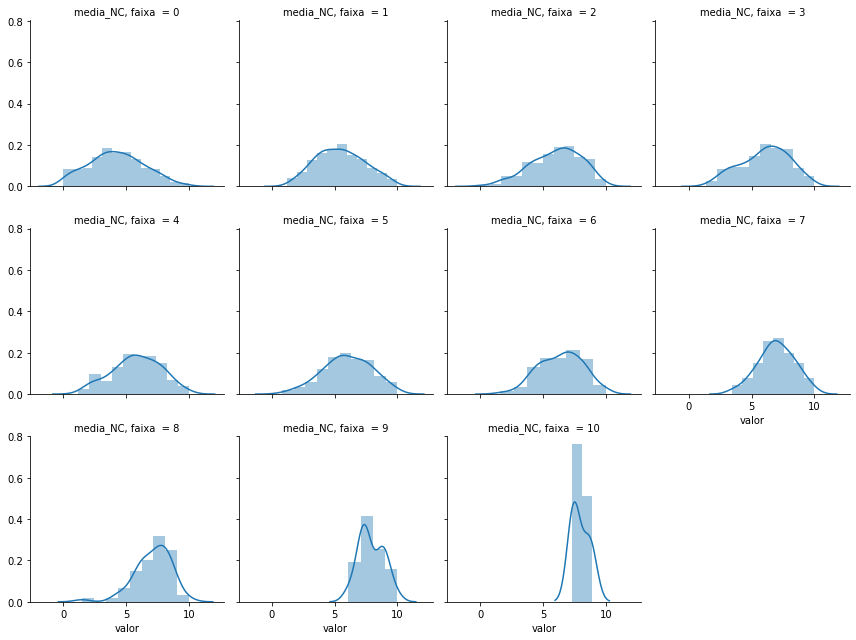

In [51]:
G = gen_plots()
G.__next__()

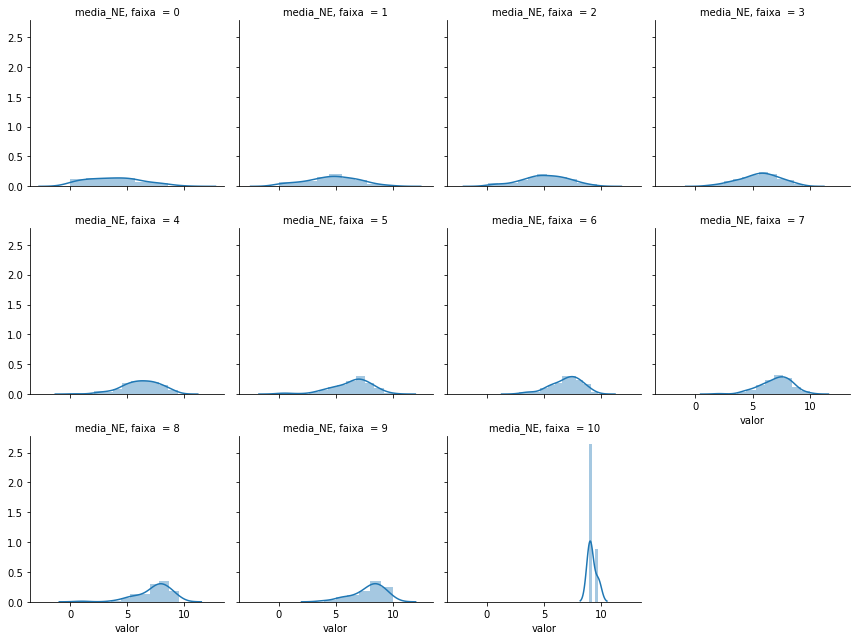

In [52]:
G.__next__()

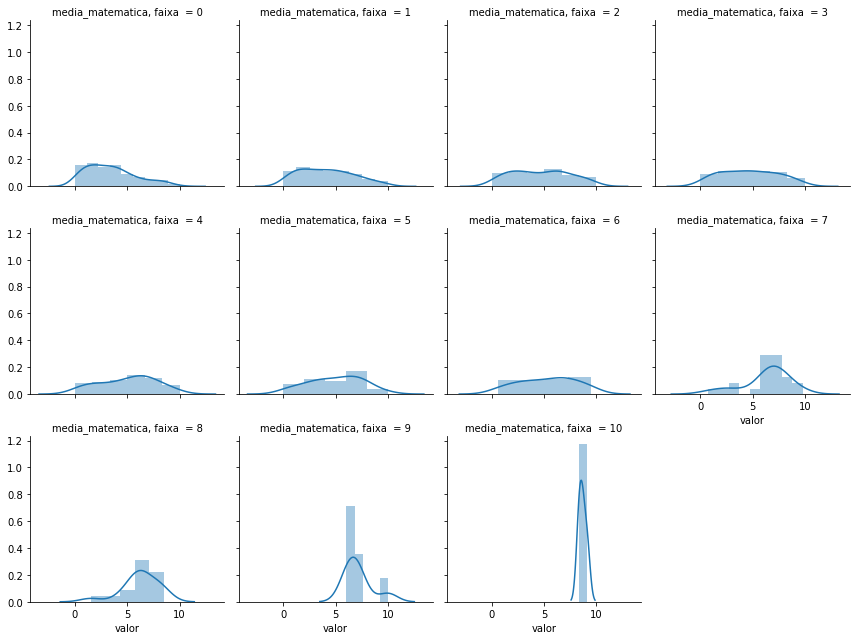

In [53]:
G.__next__()

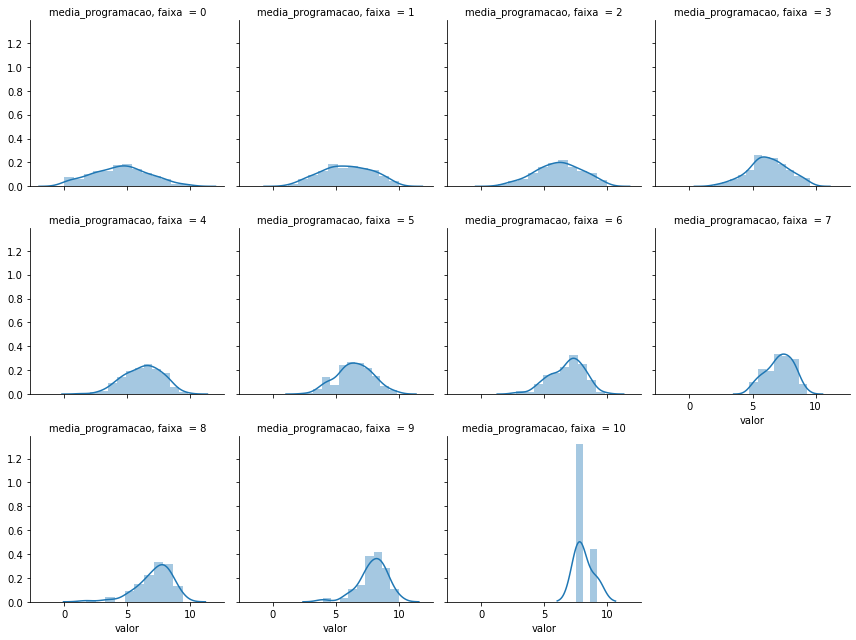

In [54]:
G.__next__()

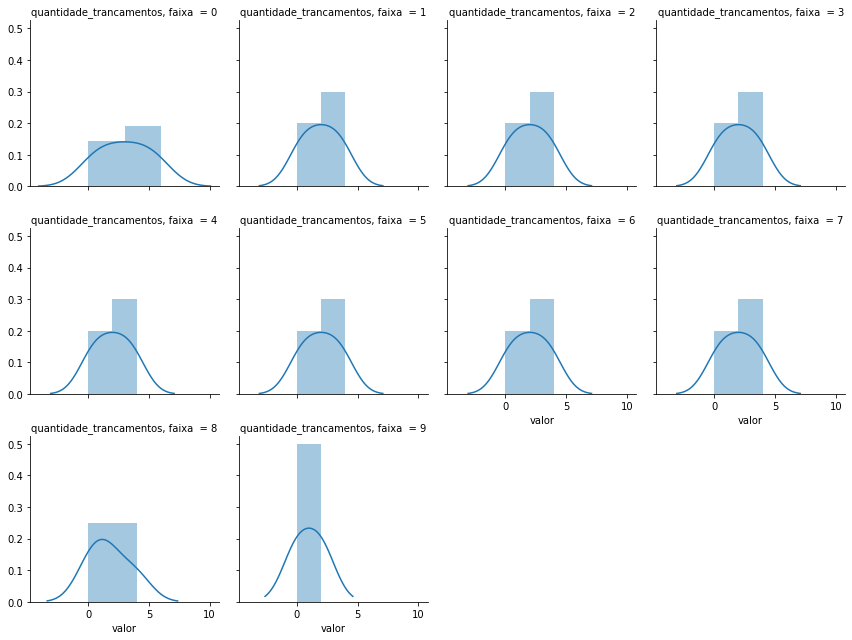

In [55]:
G.__next__()

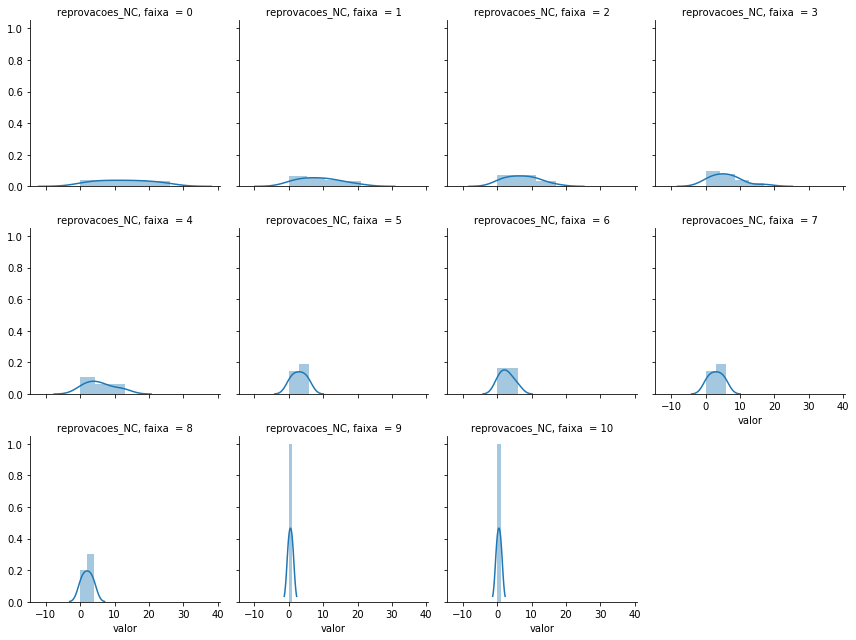

In [56]:
G.__next__()

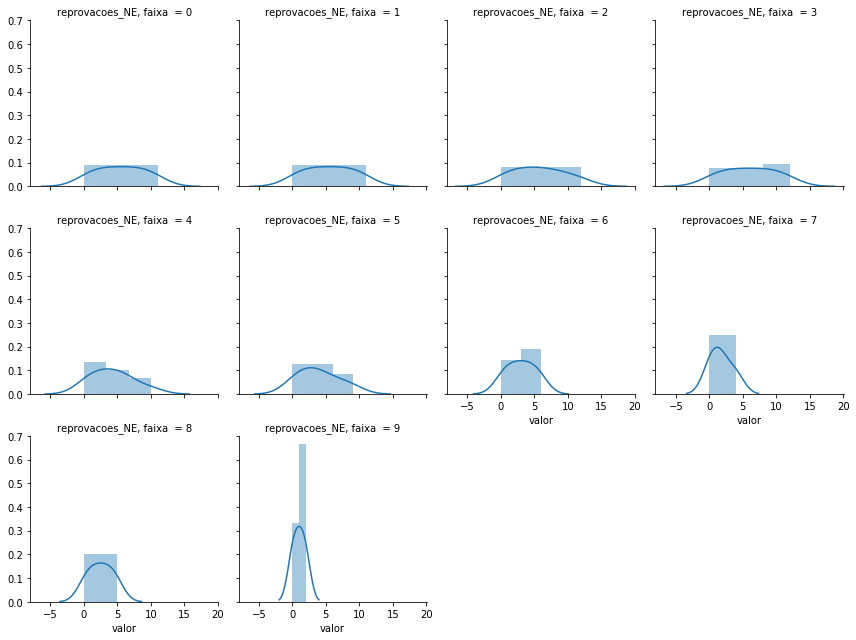

In [57]:
G.__next__()

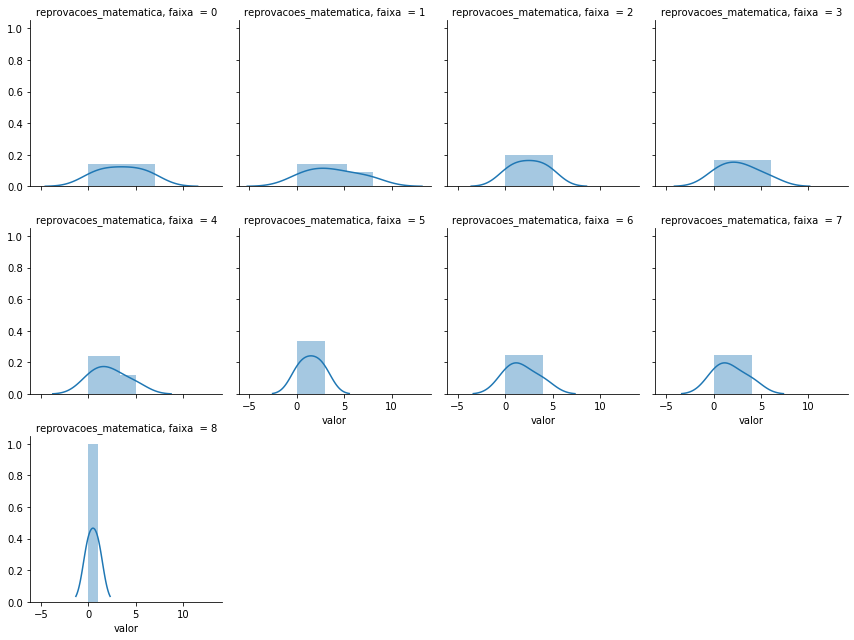

In [58]:
G.__next__()

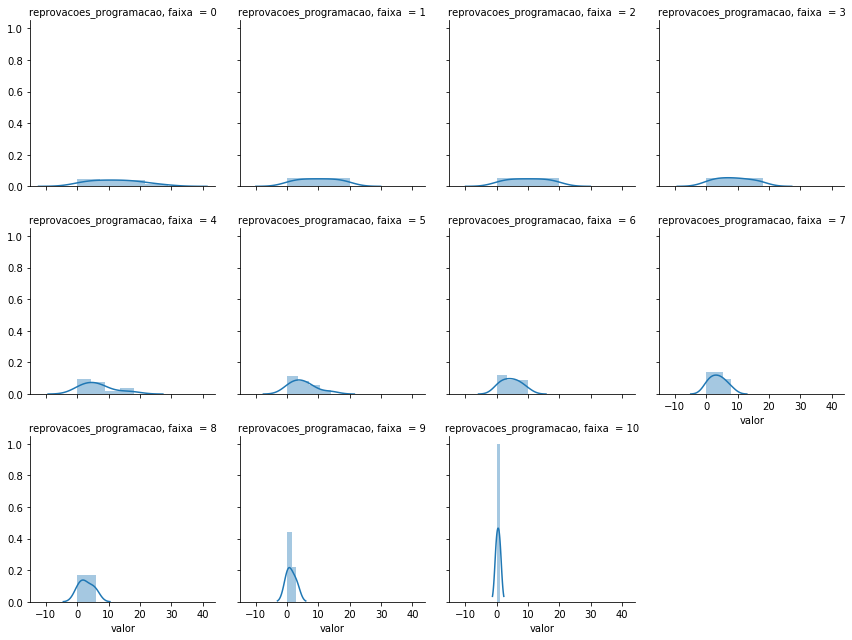

In [59]:
G.__next__()

In [60]:
G.__next__()

StopIteration: 